<a href="https://colab.research.google.com/github/PyChef1/METODOS-NUMERICOS/blob/main/MetodoSecante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodo de la Secante

El método de Newton es una técnica en extremo poderosa, pero tiene una debilidad importante: la necesidad de conocer el valor de la derivada de $f$ en cada aproximación. Con frecuencia, $f'(x)$ es mucho más difícil y necesita más operaciones aritméticas para calcular $f(x)$.

Para evitar el problema de la evaluación de la derivada en el método de Newton, presentamos una ligera variación. Por definición,
$$
f'(p_{n-1}) = \lim_{x \to p_{n-1}} \frac{f(x) - f(p_{n-1})}{x - p_{n-1}}.
$$

Si $p_{n-2}$ está cerca de $p_{n-1}$, entonces

$$
f'(p_{n-1}) \approx \frac{f(p_{n-2}) - f(p_{n-1})}{p_{n-2} - p_{n-1}}
= \frac{f(p_{n-1}) - f(p_{n-2})}{p_{n-1} - p_{n-2}}.
$$

Usando esta aproximación para $f'(p_{n-1})$ en la fórmula de Newton obtenemos

$$
p_n = p_{n-1} - \frac{f(p_{n-1})(p_{n-1} - p_{n-2})}{f(p_{n-1}) - f(p_{n-2})}.
$$

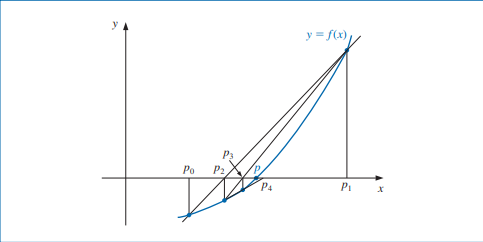

In [ ]:
import numpy as np
from tabulate import tabulate
#f: funcion a implementar el algoritmo, p0: aproximacion inicial, p1 aproximacion inicial, tol: tolerancia para la convergencia, n0 numero maximo de iteraciones
def secante(f, p_0, p_1, tol, n0):
    i = 2
    q_0 = f(p_0)
    q_1 = f(p_1)
    datos = []

    while i <= n0:
        p = p_1 - (q_1 * (p_1 - p_0)) / (q_1 - q_0) #Calcula p_i
        error = abs(p - p_1)
        datos.append([i - 1, p_0, p_1, p, f(p), error])

        if error < tol:
            print(tabulate(datos, headers=["Iteracion", "p_i", "p_{i+1}", "p", "f(p)", "Error"], tablefmt="grid"))
            return p # Procedimiento exitoso

        i += 1
        p_0 = p_1
        q_0 = q_1
        p_1 = p
        q_1 = f(p)

    print(tabulate(datos, headers=["Iteracion", "p_i", "p_{i+1}", "p", "f(p)", "Error"], tablefmt="grid"))
    return f"El metodo fallo despues de {n0} iteraciones, n0=", n0

In [ ]:
def f(x):
  return np.cos(x)-x

In [ ]:
resultado = secante(f, 0.5, np.pi/4, 1e-5, 100)
print(resultado)

+-------------+----------+-----------+----------+--------------+-------------+
|   Iteracion |      p_i |   p_{i+1} |        p |         f(p) |       Error |
+=============+==========+===========+==========+==============+=============+
|           1 | 0.5      |  0.785398 | 0.736384 |  0.00451772  | 0.049014    |
+-------------+----------+-----------+----------+--------------+-------------+
|           2 | 0.785398 |  0.736384 | 0.739058 |  4.51772e-05 | 0.002674    |
+-------------+----------+-----------+----------+--------------+-------------+
|           3 | 0.736384 |  0.739058 | 0.739085 | -2.69822e-08 | 2.70101e-05 |
+-------------+----------+-----------+----------+--------------+-------------+
|           4 | 0.739058 |  0.739085 | 0.739085 |  1.60871e-13 | 1.61222e-08 |
+-------------+----------+-----------+----------+--------------+-------------+
0.7390851332150645
